# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The southern hemisphere has warmer temperatures than the northern hemisphere, indicative of Summer vs. Winter. 
* There is no strong relationship between latitude and humidity, but very few cities have humidity less than 40%
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are a few cities with over 30 mph of wind.
* As the data represents one sample, from one day, no conclusions can be drawn. 

---

In [1]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000,  high=90.000,  size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Identify nearest city for each lat, lng combination
for (lat, lng) in zip(lats, lngs) :
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities: cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Base URL for Open Weather Map API for Current Weather
baseurl = 'http://api.openweathermap.org/data/2.5/weather'

# Initialize DataFrame to capture the city weather data
keys = ['city', 'lat', 'lon', 'temp', 'humidity', 'wind', 'clouds']
citydf = pd.DataFrame(columns=keys)

# Get date for current data set
date = time.strftime('%b %d, %Y', time.localtime())
request_time = time.time()

# For each city, request current weather 
for i in range(len(cities)) :
    
    # Issue request via API to OpenWeatherMap site
    resp = requests.get(baseurl,params={'appid':api_key,'units':'imperial','q':cities[i]})
    
    # If request is successful, append data into dat frame
    if resp.status_code == 200 :
        rj = resp.json()
        rdat = [rj['name'], rj['coord']['lat'], rj['coord']['lon'], 
                rj['main']['temp'],  rj['main']['humidity'], 
                rj['wind']['speed'], rj['clouds']['all']]
        
        citydf = citydf.append(pd.Series(rdat, keys), ignore_index=True)
        print (f'Processing for city {i} : {cities[i]} complete')
        
    # Request failed, print response message
    else : 
        print (f'Processing for city {i} : {cities[i]} {resp.content}')
    
    # Weather API has limit of 60 requests per second. At 50 requests, 
    # check if elapsed time less than 1 second. If so, sleep for 1 second
    if ((i+1)%50)==0 :
        if (time.time() - request_time) < 1 :
            print (f'Pause 1 second to not exceed request limit 60/sec')
            time.sleep(1)
        request_time = time.time()
              
print(f'\nProcessing complete, {citydf.shape[0]} cities processed.')

Processing for city 0 : saskylakh complete
Processing for city 1 : kodiak complete
Processing for city 2 : hunza b'{"cod":"404","message":"city not found"}'
Processing for city 3 : bredasdorp complete
Processing for city 4 : alofi complete
Processing for city 5 : barentsburg b'{"cod":"404","message":"city not found"}'
Processing for city 6 : camalu complete
Processing for city 7 : saint-augustin complete
Processing for city 8 : hamilton complete
Processing for city 9 : nantucket complete
Processing for city 10 : port lincoln complete
Processing for city 11 : broome complete
Processing for city 12 : atuona complete
Processing for city 13 : mys shmidta b'{"cod":"404","message":"city not found"}'
Processing for city 14 : buta complete
Processing for city 15 : albany complete
Processing for city 16 : ushuaia complete
Processing for city 17 : ryotsu complete
Processing for city 18 : grand river south east b'{"cod":"404","message":"city not found"}'
Processing for city 19 : severo-kurilsk co

Processing for city 172 : carnarvon complete
Processing for city 173 : puerto princesa complete
Processing for city 174 : namibe complete
Processing for city 175 : bathsheba complete
Processing for city 176 : celica complete
Processing for city 177 : tashara complete
Processing for city 178 : lasa complete
Processing for city 179 : thompson complete
Processing for city 180 : puerto madryn complete
Processing for city 181 : alihe complete
Processing for city 182 : bethel complete
Processing for city 183 : walvis bay complete
Processing for city 184 : san cristobal complete
Processing for city 185 : majene complete
Processing for city 186 : palabuhanratu b'{"cod":"404","message":"city not found"}'
Processing for city 187 : vila complete
Processing for city 188 : pajapan complete
Processing for city 189 : vila velha complete
Processing for city 190 : olavarria complete
Processing for city 191 : makakilo city complete
Processing for city 192 : urengoy complete
Processing for city 193 : nuu

Processing for city 345 : karlshamn complete
Processing for city 346 : amapa complete
Processing for city 347 : dobele complete
Processing for city 348 : kutahya complete
Processing for city 349 : mount isa complete
Processing for city 350 : carutapera complete
Processing for city 351 : paris complete
Processing for city 352 : camacha complete
Processing for city 353 : luanda complete
Processing for city 354 : frontera complete
Processing for city 355 : veraval complete
Processing for city 356 : nguiu b'{"cod":"404","message":"city not found"}'
Processing for city 357 : graben-neudorf complete
Processing for city 358 : charlotte complete
Processing for city 359 : taltal complete
Processing for city 360 : inuvik complete
Processing for city 361 : coaticook complete
Processing for city 362 : safaga b'{"cod":"404","message":"city not found"}'
Processing for city 363 : kuching complete
Processing for city 364 : zmiyiv b'{"cod":"404","message":"city not found"}'
Processing for city 365 : da

Processing for city 516 : bella vista complete
Processing for city 517 : nishihara complete
Processing for city 518 : kampot complete
Processing for city 519 : christchurch complete
Processing for city 520 : shablykino complete
Processing for city 521 : sakaraha complete
Processing for city 522 : bilibino complete
Processing for city 523 : garowe complete
Processing for city 524 : dingle complete
Processing for city 525 : fairmont complete
Processing for city 526 : shagonar complete
Processing for city 527 : aquiraz complete
Processing for city 528 : calama complete
Processing for city 529 : leshukonskoye complete
Processing for city 530 : moerai complete
Processing for city 531 : ixtapa complete
Processing for city 532 : galle complete
Processing for city 533 : rabat complete
Processing for city 534 : hami complete
Processing for city 535 : mecca complete
Processing for city 536 : tasbuget b'{"cod":"404","message":"city not found"}'
Processing for city 537 : tromso complete
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output processed city to file
citydf.to_csv('citydf.csv')

# Sample head of the data frame
citydf.head()

,city,lat,lon,temp,humidity,wind,clouds
0,Saskylakh,71.97,114.09,-12.98,59,7.20,44
1,Kodiak,39.95,-94.76,29.25,92,6.93,1
2,Bredasdorp,-34.53,20.04,66.49,88,8.21,92
3,Alofi,-19.06,-169.92,80.60,78,4.70,92
4,Camalu,30.85,-116.07,51.06,59,2.17,76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

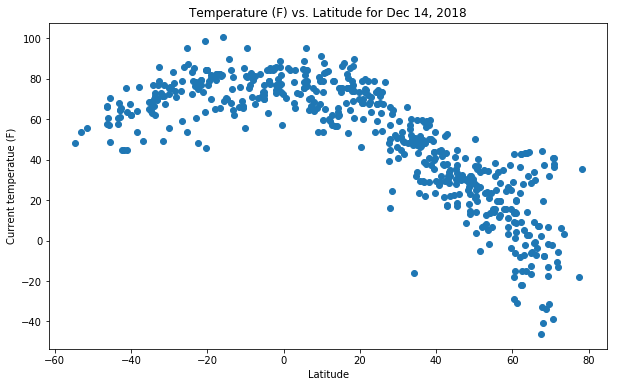

In [5]:
# Scatter plot of City date, temperature vs. latitude
plt.figure(figsize=(10,6))
plt.plot(citydf['lat'], citydf['temp'], 'o')
plt.xlabel('Latitude')
plt.ylabel('Current temperatue (F)')
plt.title(f'Temperature (F) vs. Latitude for {date}')

#Save plot figure to file : CitiesTempVsLat.png
plt.savefig('CitiesTempVsLat.png')

#### Latitude vs. Humidity Plot

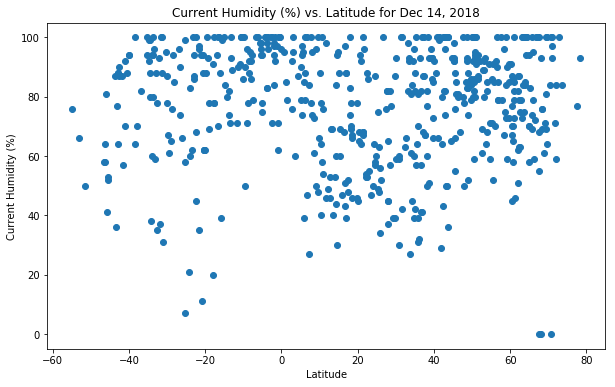

In [6]:
# Scatter plot of City date, humidity vs. latitude
plt.figure(figsize=(10,6))
plt.plot(citydf['lat'], citydf['humidity'], 'o')
plt.xlabel('Latitude')
plt.ylabel('Current Humidity (%)')
plt.title(f'Current Humidity (%) vs. Latitude for {date}')

#Save plot figure to file : CitiesHumidityVsLat.png
plt.savefig('CitiesHumidityVsLat.png')

#### Latitude vs. Cloudiness Plot

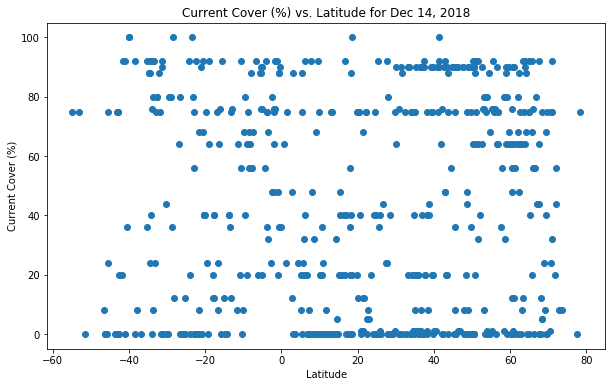

In [7]:
# Scatter plot of City date, cloud cover vs. latitude
plt.figure(figsize=(10,6))
plt.plot(citydf['lat'], citydf['clouds'], 'o')
plt.xlabel('Latitude')
plt.ylabel('Current Cover (%)')
plt.title(f'Current Cover (%) vs. Latitude for {date}')

#Save plot figure to file : CitiesCloudVsLat.png
plt.savefig('CitiesCloudVsLat.png')

#### Latitude vs. Wind Speed Plot

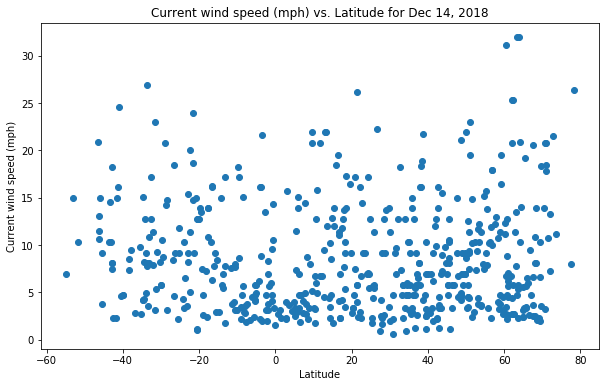

In [8]:
# Scatter plot of City date, wind vs. latitude
plt.figure(figsize=(10,6))
plt.plot(citydf['lat'], citydf['wind'], 'o')
plt.xlabel('Latitude')
plt.ylabel('Current wind speed (mph)')
plt.title(f'Current wind speed (mph) vs. Latitude for {date}')

#Save plot figure to file : CitiesWindVsLat.png
plt.savefig('CitiesWindVsLat.png')